## ML Assignment Que 4 (192CD009)

Importing Networkx Library to define the graph from the question .

In [0]:
import matplotlib.pyplot as plt
import networkx as nx
import numpy as np
import random

%matplotlib inline

Graph From the question is :

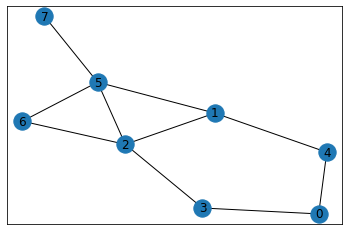

In [77]:
edges = [(0,3),(0,4),(1,2),(1,4),(1,5),(2,1),(2,3),(2,5),(2,6),(3,0),(3,2),(4,0),(4,1),(5,1),(5,2),(5,6),(5,7),(6,2),(6,5),(7,5)]
G = nx.Graph()
G.add_edges_from(edges)
pos = nx.spring_layout(G)
nx.draw_networkx_nodes(G,pos)
nx.draw_networkx_edges(G,pos)
nx.draw_networkx_labels(G,pos)
plt.show()

This is the Graph given in the problem statement .

...............................................................................................................................................................................................................................................


## **Initializing Reward and Q matrix**

In [0]:
R = np.matrix(np.zeros(shape =(8,8)))

for x in G[7]:
  R[x,7]=100

In [0]:
Q = np.matrix(np.zeros(shape=(8,8)))
Q-=100
for node in G.nodes:
  for x in G[node]:
    Q[node,x]=0
    Q[x,node]=0

Lets take a look at the R and Q matrices :

In [80]:
import pandas as pd
pd.DataFrame(R) #Reward Matrix

,0,1,2,3,4,5,6,7
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,100.0
6,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
7,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [81]:
pd.DataFrame(Q) #Q matrix

,0,1,2,3,4,5,6,7
0,-100.0,-100.0,-100.0,0.0,0.0,-100.0,-100.0,-100.0
1,-100.0,-100.0,0.0,-100.0,0.0,0.0,-100.0,-100.0
2,-100.0,0.0,-100.0,0.0,-100.0,0.0,0.0,-100.0
3,0.0,-100.0,0.0,-100.0,-100.0,-100.0,-100.0,-100.0
4,0.0,0.0,-100.0,-100.0,-100.0,-100.0,-100.0,-100.0
5,-100.0,0.0,0.0,-100.0,-100.0,-100.0,0.0,0.0
6,-100.0,-100.0,0.0,-100.0,-100.0,0.0,-100.0,-100.0
7,-100.0,-100.0,-100.0,-100.0,-100.0,0.0,-100.0,-100.0


Function which takes a starting node and returns the next node.It also accepts an exploration rate for random exploration. Otherwise, it chooses action according to the highest Q value of the possible actions.

In [0]:
def next_number(start,er):
  random_value = random.uniform(0,1) #random between 0 and 1
  if random_value<er: #if random is below the threshold then it chooses next action randomly
    sample=G[start]
  else:
    sample=np.where(Q[start,] == np.max(Q[start,]))[1]
  next_node=int(np.random.choice(sample,1))
  return next_node

Now a function to update Q-value of the action taken:

In [0]:
def updateQ(node1,node2,lr,discount):
  max_index = np.where(Q[node2,] == np.max(Q[node2,]))[1] #finds index of the highest Q-value
  if max_index.shape[0] > 1 :
    max_index = int(np.random.choice(max_index,size = 1))
  else:
    max_index = int(max_index)
  max_value = Q[node2,max_index]
  Q[node1,node2] = int((1-lr)*Q[node1,node2]+lr*(R[node1,node2] + discount*max_value)) #updates the Q-value

Improving Q-values by starting at random nodes and making 50000 walk :

In [0]:
def learn(er,lr,discount):
  for i in range(50000):
    start = np.random.randint(0,7)
    next_node=next_number(start,er)
    updateQ(start,next_node,lr,discount)

learn(0.5,0.8,0.8) #exploration rate,learning rate and discount factor of learning

Let’s check the final Q-values

In [85]:
pd.DataFrame(Q)

,0,1,2,3,4,5,6,7
0,-100.0,-100.0,-100.0,49.0,49.0,-100.0,-100.0,-100.0
1,-100.0,-100.0,62.0,-100.0,49.0,78.0,-100.0,-100.0
2,-100.0,62.0,-100.0,49.0,-100.0,78.0,62.0,-100.0
3,38.0,-100.0,62.0,-100.0,-100.0,-100.0,-100.0,-100.0
4,38.0,62.0,-100.0,-100.0,-100.0,-100.0,-100.0,-100.0
5,-100.0,62.0,62.0,-100.0,-100.0,-100.0,62.0,99.0
6,-100.0,-100.0,62.0,-100.0,-100.0,78.0,-100.0,-100.0
7,-100.0,-100.0,-100.0,-100.0,-100.0,0.0,-100.0,-100.0


Now we can find shortest path between two nodes, by choosing highest Q-value from Q matrix when deciding an action:

In [0]:
def shortest_path(begin,end):
  path=[begin]
  next_node=np.argmax(Q[begin,])
  path.append(next_node)
  while next_node != end:
    next_node = np.argmax(Q[next_node,])
    path.append(next_node)
  return path

The Shortest Path between 0 and 5 is :

In [0]:
Answer = shortest_path(0,5) 

In [88]:
print('So the shortest path is ' + str(Answer))

So the shortest path is [0, 3, 2, 5]
